In [2]:
from Skipass.utils.df_typing import mf_date_conv_filtered
from Skipass.station_filter.station_filter import station_filter_nivo,station_filter_synop, station_mapping 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path_to_nivo = '../raw_data/weather_nivo_data.csv'
path_to_synop = '../raw_data/weather_synop_data.csv'
year = 2018
from Skipass.utils.DataCleaner import replace_values,delete_bad_measures,select_stations
import numpy as np


In [3]:
#df_nivo = pd.read_csv(path_to_nivo)
df_synop = pd.read_csv(path_to_synop)

/home/romain/.pyenv/versions/3.8.6/envs/skipass/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
col_nivo_float = ['haut_sta','ff','t','td','n','rr24','tn12','tn24','tx12','tx24','ht_neige','ssfrai','perssfrai','phenspe1','phenspe2','t_neige','ff_alti','ht_neige_alti','neige_fraiche','m_vol_neige']

for i in col_nivo_float:
    df_nivo1[i] = df_nivo1[i].astype(float,errors='ignore')
    
col_nivo_int = ['dd','u','ww','w1','w2','nbas','hbas','cl','cm','ch','nnuage1','etat_neige','prof_sonde','nuage_val','chasse_neige','aval_descr','aval_genre','aval_depart','aval_expo','aval_risque','dd_alti','teneur_eau','grain_predom','grain_nombre','grain_diametr','homogeneite']

for j in col_nivo_int:
    df_nivo1[j] = df_nivo1[j].astype(float,errors='ignore')
;    #df_nivo1[i] = pd.to_numeric(i,errors='ignore')

NameError: name 'df_nivo1' is not defined

In [ ]:
corr = df_nivo1.corr()
plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(corr,cmap="vlag")

In [ ]:
pd.set_option('display.max_rows',61)
ratio_nivo = df_nivo1.isnull().sum()/len(df_nivo1)

# Airport weather monitoring

In [ ]:
df_stations_synop = pd.read_csv('../documentation/liste_stations_rawdata_synop.txt', delimiter= ";")
station_mapping(df_stations_synop)

In [4]:
df_synop = df_synop.replace("mq",value=np.nan)
df_synop = df_synop.replace("/",value=np.nan)

In [5]:
col_synop_float = ['ff','t','td','vv','n','tn12','tn24','tx12','tx24','tw','raf10','rafper','per','ht_neige','ssfrai','perssfrai','rr1','rr3','rr6','rr12','rr24','phenspe1','phenspe2','phenspe3','phenspe4']
col_synop_int = ['pmer','tend','cod_tend','dd','u','ww','w1','w2','nbas','hbas','cl','cm','ch','pres','niv_bar','geop','tend24','sw','etat_sol','nnuage1','nnuage2','nnuage3','nnuage4','ctype1','ctype2','ctype3','ctype4','hnuage1','hnuage2','hnuage3','hnuage4']

In [12]:
df_synop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948926 entries, 0 to 1948925
Data columns (total 61 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   numer_sta    int64  
 2   date         int64  
 3   pmer         object 
 4   tend         object 
 5   cod_tend     object 
 6   dd           object 
 7   ff           float64
 8   t            float64
 9   td           float64
 10  u            object 
 11  vv           float64
 12  ww           object 
 13  w1           object 
 14  w2           object 
 15  n            float64
 16  nbas         object 
 17  hbas         object 
 18  cl           object 
 19  cm           object 
 20  ch           object 
 21  pres         object 
 22  niv_bar      object 
 23  geop         object 
 24  tend24       object 
 25  tn12         float64
 26  tn24         float64
 27  tx12         float64
 28  tx24         float64
 29  tminsol      object 
 30  sw           object 
 31  tw           float64
 32

In [7]:
for i in col_synop_float:
    df_synop[i] = df_synop[i].astype(float,errors='ignore')

In [11]:
for i in col_synop_int:
    df_synop[i] = df_synop[i].astype(str)

In [13]:
for i in col_synop_int:
    df_synop[i] = df_synop[i].astype(int,errors='ignore')

In [14]:
df_synop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948926 entries, 0 to 1948925
Data columns (total 61 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   numer_sta    int64  
 2   date         int64  
 3   pmer         object 
 4   tend         object 
 5   cod_tend     object 
 6   dd           object 
 7   ff           float64
 8   t            float64
 9   td           float64
 10  u            object 
 11  vv           float64
 12  ww           object 
 13  w1           object 
 14  w2           object 
 15  n            float64
 16  nbas         object 
 17  hbas         object 
 18  cl           object 
 19  cm           object 
 20  ch           object 
 21  pres         object 
 22  niv_bar      object 
 23  geop         object 
 24  tend24       object 
 25  tn12         float64
 26  tn24         float64
 27  tx12         float64
 28  tx24         float64
 29  tminsol      object 
 30  sw           object 
 31  tw           float64
 32

In [60]:
pd.set_option('display.max_rows',61)
ratio_synop = df_synop.isnull().sum()/len(df_synop)

<AxesSubplot:>

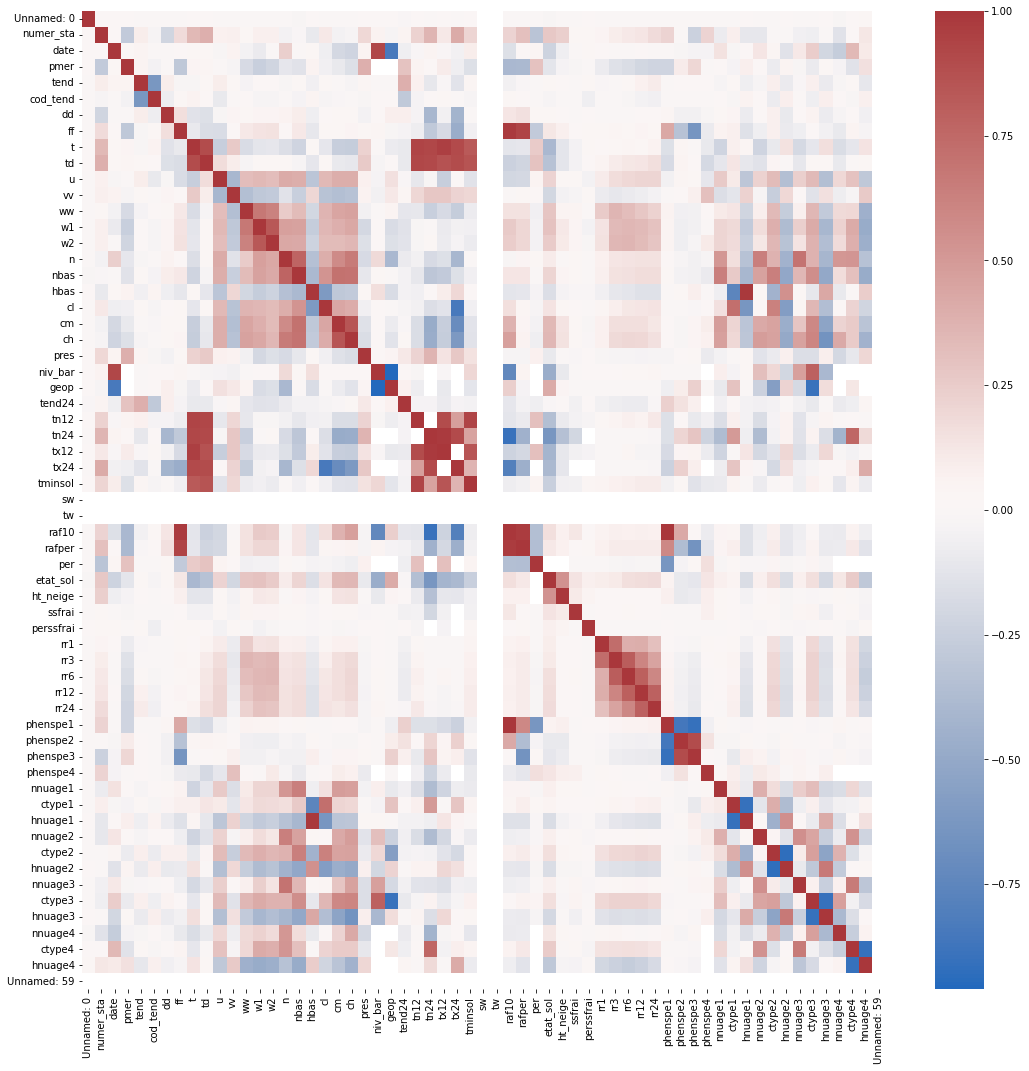

In [56]:
corr = df_synop.corr()
plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(corr,cmap="vlag")

In [112]:
mnemo = ['date','numer_sta','pmer','dd','ff','t','u','n','rr24','ssfrai']
mnemo1 = ['date','numer_sta','dd','ff','t','u','n','rr24','ssfrai'] #manque pression niveau de la mer (pmer)

In [100]:
ratio_nivo = pd.Series(ratio_nivo,name='nivo')
ratio_synop = pd.Series(ratio_synop,name='synop')

In [101]:
ratio_comp = pd.concat([ratio_nivo, ratio_synop],axis=1)

In [102]:
pd.set_option('display.max_rows',84)

In [104]:
ratio_comp.dropna().T[mnemo1].T

,nivo,synop
dd,0.028261,0.011368
ff,0.028079,0.011038
t,0.038662,0.003903
u,0.170110,0.008026
n,0.043540,0.489335
rr24,0.402734,0.435342
ssfrai,0.019650,0.836341


In [111]:
df_synop

,Unnamed: 0,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,0.0,7005.0,2.018070e+13,101190.0,-10.0,6.0,60.0,2.8,291.95,287.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,7015.0,2.018070e+13,101240.0,10.0,2.0,30.0,3.5,294.95,282.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,7020.0,2.018070e+13,101160.0,-10.0,0.0,90.0,6.8,289.95,287.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,7027.0,2.018070e+13,101110.0,30.0,0.0,300.0,1.9,289.65,288.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,7037.0,2.018070e+13,101090.0,-10.0,8.0,50.0,3.8,293.85,289.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948921,14633.0,78925.0,2.021073e+13,101620.0,-20.0,5.0,90.0,7.4,302.95,297.35,...,5.0,NaN,990.0,5.0,NaN,1260.0,NaN,NaN,NaN,NaN
1948922,14634.0,81401.0,2.021073e+13,101350.0,10.0,5.0,320.0,1.4,298.45,297.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948923,14635.0,81405.0,2.021073e+13,101360.0,-10.0,5.0,70.0,3.4,302.55,297.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948924,14636.0,81408.0,2.021073e+13,101300.0,20.0,5.0,30.0,1.3,300.75,296.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_synop[mnemo1].loc[df_synop.numer_sta == 7481.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33795 entries, 25 to 1948892
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       33795 non-null  float64
 1   numer_sta  33795 non-null  float64
 2   dd         33791 non-null  float64
 3   ff         33792 non-null  float64
 4   t          33781 non-null  float64
 5   u          33778 non-null  float64
 6   n          32384 non-null  float64
 7   rr24       21016 non-null  float64
 8   ssfrai     29846 non-null  float64
dtypes: float64(9)
memory usage: 2.6 MB


In [ ]:
df_synop1 = pd.read_csv(path_to_synop)